# Example of usage Spark OCR to detect tables and forms

## Install spark-ocr python packge
Need specify path to `spark-ocr-assembly-[version].jar` or `secret`

In [1]:
secret = ""
license = ""
version = secret.split("-")[0]
spark_ocr_jar_path = "../../target/scala-2.12"

In [2]:
# install from PYPI using secret
# %pip install spark-ocr==$OCR_VERSION --extra-index-url=https://pypi.johnsnowlabs.com/$SPARK_OCR_SECRET --upgrade

## Initialization of spark session

In [3]:
import sys
import os
from sparkocr import start

if license:
    os.environ['JSL_OCR_LICENSE'] = license

spark = start(secret=secret, jar_path=spark_ocr_jar_path)
spark

Spark version: 3.2.1
Spark NLP version: 4.2.4
Spark NLP for Healthcare version: 4.3.0
Spark OCR version: 4.3.3



## Import OCR transformers

In [4]:
import pkg_resources

from pyspark.ml import PipelineModel
import pyspark.sql.functions as f

from sparkocr import start
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import *
from sparkocr.metrics import score

## Read images and display it

In [5]:
!wget -q https://github.com/JohnSnowLabs/spark-ocr-workshop/raw/master/jupyter/data/tabform_images/irs_sp_1.jpg


    Image #0:
    Origin: file:/home/jose/spark-ocr/workshop/jupyter/irs_sp_1.jpg
    Resolution: 150 dpi
    Width: 1275 px
    Height: 1650 px
    Mode: ImageType.TYPE_BYTE_GRAY
    Number of channels: 1


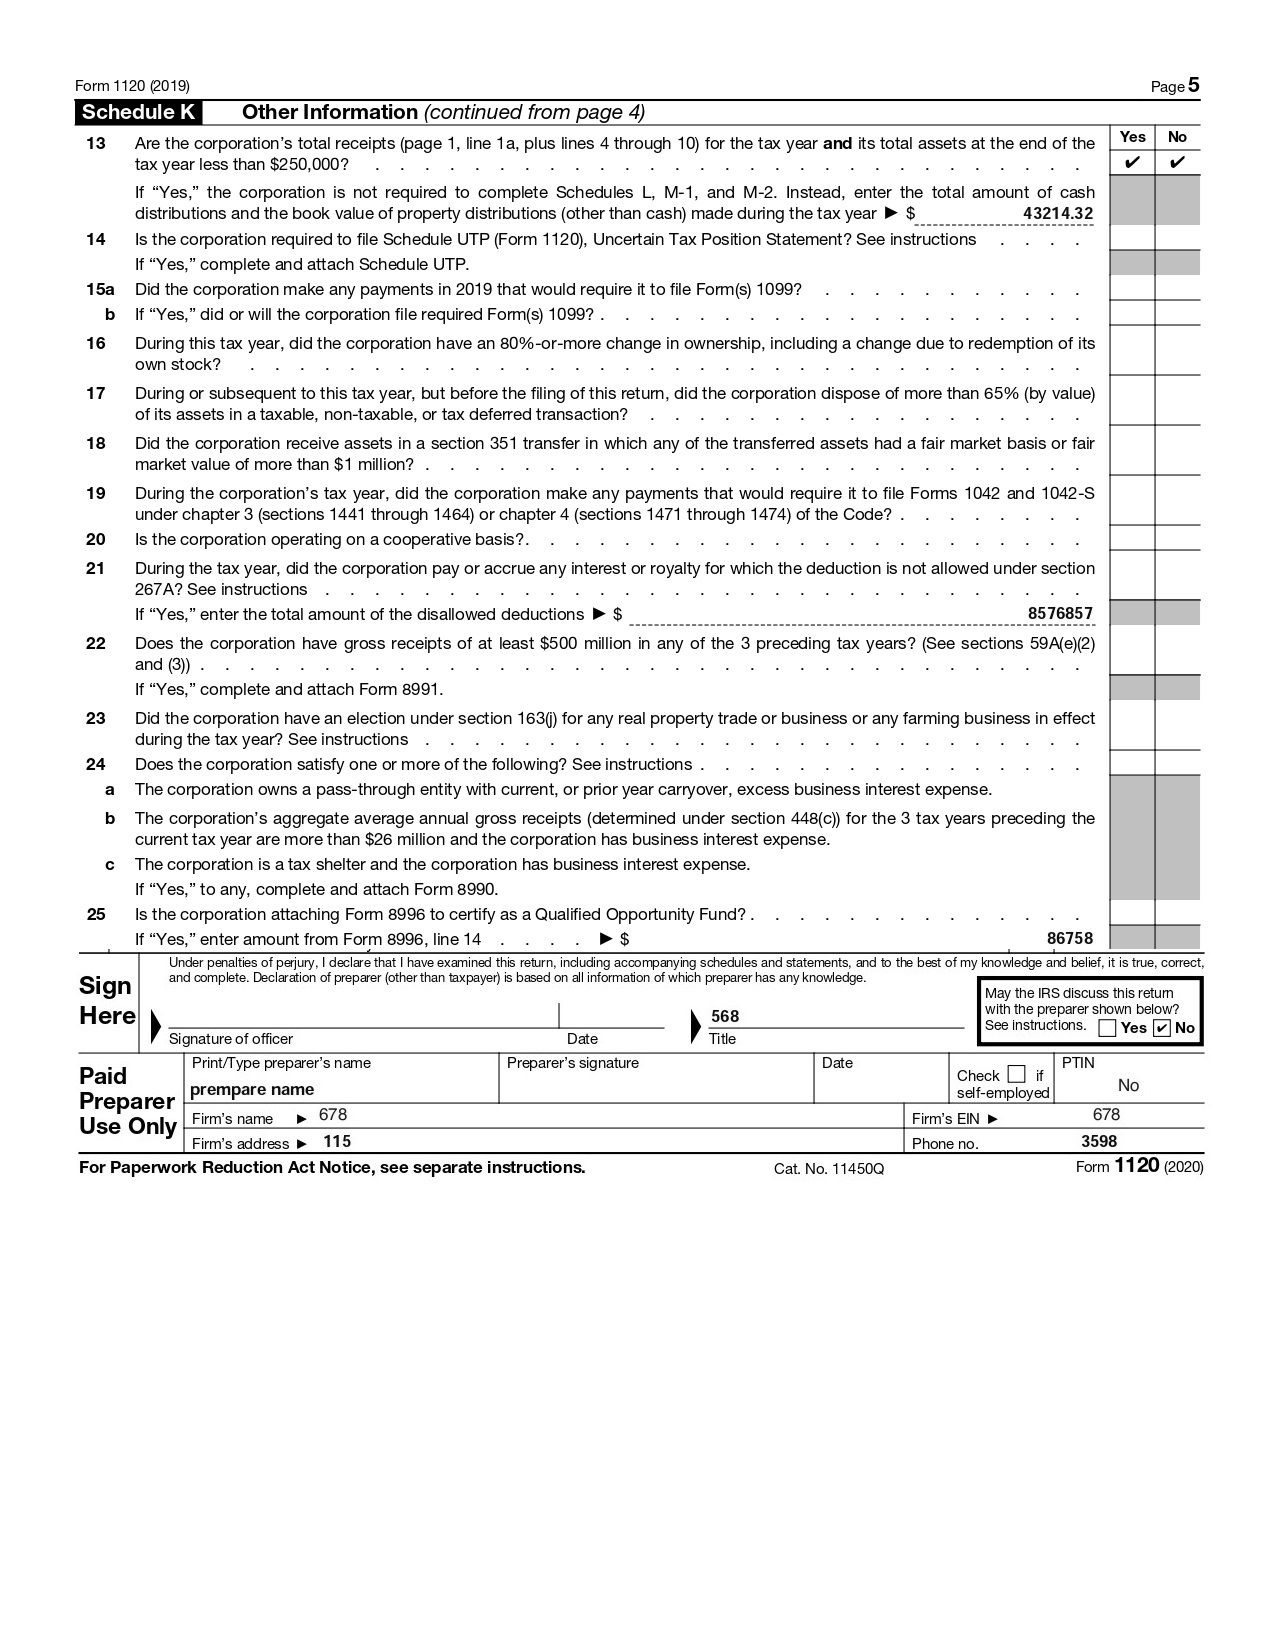

In [6]:
imagePath = "irs_sp_1.jpg"
image_df = spark.read.format("binaryFile").load(imagePath)

display_images(BinaryToImage().transform(image_df), "image")

## Define OCR Pipeline

In [7]:
binary_to_image = BinaryToImage() 
binary_to_image.setImageType(ImageType.TYPE_3BYTE_BGR)

region_detector = ImageDocumentRegionDetector.pretrained("tabform_v1", "en", "clinical/ocr") 
region_detector.setInputCol("image") 
region_detector.setOutputCol("regions") 
region_detector.setScoreThreshold(0.25)

draw_regions = ImageDrawRegions()
draw_regions.setInputCol("image")
draw_regions.setInputRegionsCol("regions")
draw_regions.setOutputCol("image_with_regions")
draw_regions.setRectColor(Color.red)

pipeline = PipelineModel(stages=[
    binary_to_image,
    region_detector,
    draw_regions
])

tabform_v1 download started this may take some time.
Approximate size to download 23.1 MB


## Run pipeline and show results


    Image #0:
    Origin: file:/home/jose/spark-ocr/workshop/jupyter/irs_sp_1.jpg
    Resolution: 0 dpi
    Width: 1275 px
    Height: 1650 px
    Mode: ImageType.TYPE_3BYTE_BGR
    Number of channels: 3


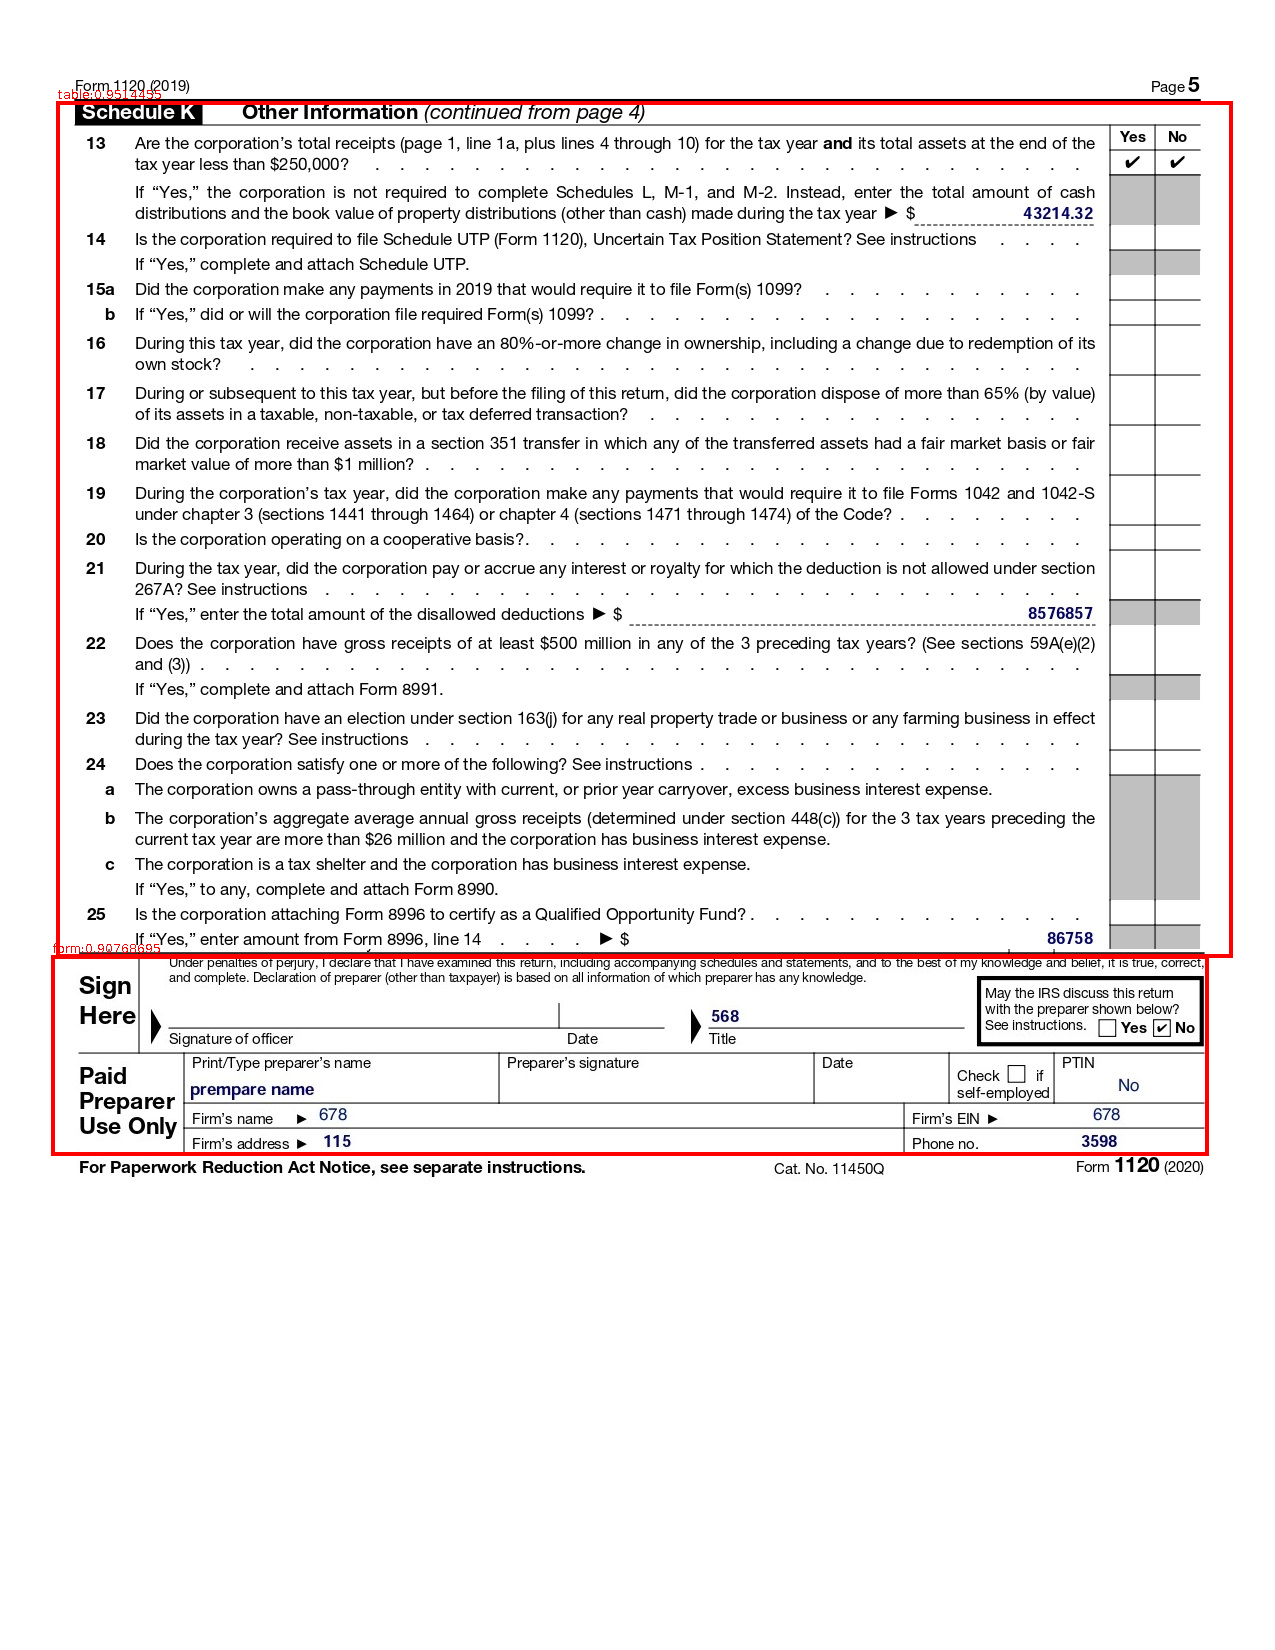

In [8]:
result = pipeline.transform(image_df)
display_images(result, "image_with_regions")

In [9]:
spark.stop()